In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
df = pd.read_csv(r"D:\Desktop\tap tanh hoc code\.vscode\ADY\project_weather_air_pollution\data\weather_air_cleaned", parse_dates=["date_time"])
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0


In [4]:
df["year"] = df["date_time"].dt.year
df["month"] = df["date_time"].dt.month
df["day"] = df["date_time"].dt.day
def get_season(season):
    _sea = {12: "Winter", 1: "Winter", 2: "Winter", 
              3: "Spring", 4: "Spring", 5: "Spring", 
              6: "Summer", 7: "Summer", 8: "Summer", 
              9: "Autumn", 10: "Autumn", 11: "Autumn"}
    return _sea.get(season)
df["season"] = df["month"].map(get_season)
df["weekday_name"] = df["date_time"].dt.day_name()
new_df = df.copy()
group_year = new_df.groupby(["year"])
group_month = new_df.groupby(["month"])
group_season = new_df.groupby(["season"])
group_year_month = new_df.groupby(["year", "month"])
group_year_season = new_df.groupby(["year", "season"])
group_season_weekday = new_df.groupby(["season", "weekday_name"])
years = [i for i in range(2020, 2025)]
months = [i for i in range(1, 13)]
seasons = ["Spring", "Summer", "Autumn", "Winter"]
air = ['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
weather = ['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity']
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,year,month,day,season,weekday_name
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0,2020,1,1,Winter,Wednesday
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0,2020,1,2,Winter,Thursday
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0,2020,1,3,Winter,Friday
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0,2020,1,4,Winter,Saturday
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0,2020,1,5,Winter,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0,2024,9,19,Autumn,Thursday
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0,2024,9,20,Autumn,Friday
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0,2024,9,21,Autumn,Saturday
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0,2024,9,22,Autumn,Sunday


In [5]:
df.columns

Index(['date_time', 'totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph',
       'pressure_in', 'humidity', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co',
       'year', 'month', 'day', 'season', 'weekday_name'],
      dtype='object')

In [6]:
cols = ['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
df[cols].describe()

,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,7.433079,9.166030,25.028704,9.223542,29.823044,80.009838,36.372704,20.649026,51.346262,10.600116,13.186921,3.219956
std,24.328345,1.246316,4.647078,3.707362,0.187886,10.125982,27.204867,16.506355,88.280234,5.074927,8.286860,2.348592
min,0.000000,1.000000,11.200000,2.390000,29.410000,36.000000,0.874000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,0.000000,8.700000,21.500000,6.690000,29.660000,73.000000,17.000000,11.000000,19.000000,10.000000,8.000000,2.000000
50%,0.735000,9.800000,25.600000,8.180000,29.800000,83.000000,28.000000,17.000000,26.000000,11.000000,13.000000,3.000000
75%,5.025000,10.000000,28.800000,10.762500,29.970000,88.000000,46.000000,27.000000,39.000000,15.000000,13.000000,4.000000
max,506.710000,10.000000,35.400000,32.930000,30.350000,97.000000,272.688000,391.552000,500.000000,23.000000,48.000000,29.000000


### Summary Statistics

In [7]:
df['pm10'].describe()

count    1728.000000
mean       20.649026
std        16.506355
min         1.000000
25%        11.000000
50%        17.000000
75%        27.000000
max       391.552000
Name: pm10, dtype: float64

### Overall Average

In [8]:
mean = df['pm10'].mean()
print(f'The mean value for PM2.5 is {mean}')

The mean value for PM2.5 is 20.649025940484194


### PM10 and PM2.5 Comparison

#### Monthly Average of PM2.5 and PM10 Over Time

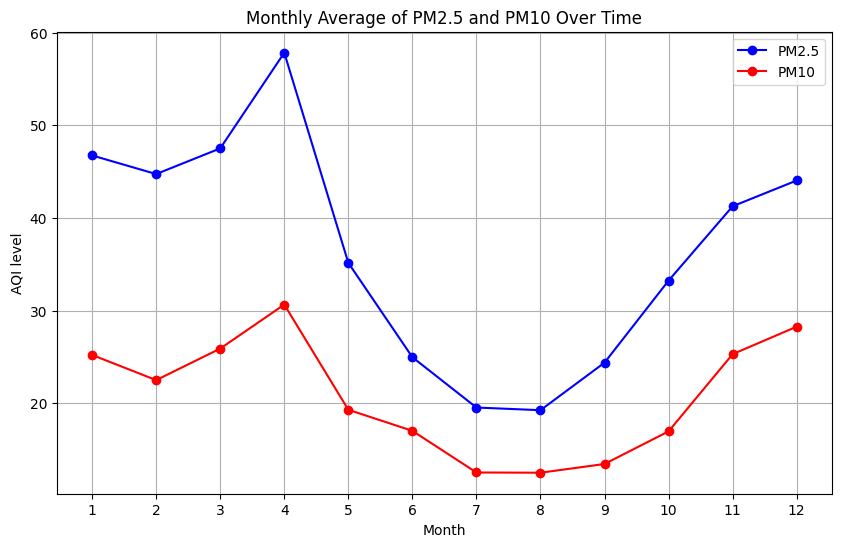

In [9]:
plt.figure(figsize=(10, 6))
mean_pm25 = df.groupby('month')['pm2_5'].mean().sort_index()
mean_pm10 = df.groupby('month')['pm10'].mean().sort_index()

plt.plot(mean_pm25.index, mean_pm25, marker='o', label='PM2.5', color='blue', linestyle='-')
plt.plot(mean_pm10.index, mean_pm10, marker='o', label='PM10', color='red', linestyle='-')

plt.title("Monthly Average of PM2.5 and PM10 Over Time")
plt.xlabel("Month")
plt.ylabel("AQI level")
plt.xticks(mean_pm10.index)

plt.legend()
plt.grid(True)

plt.show()

#### Check PM10 and PM2.5 Correlation

Correlation between PM2.5 and PM10 is:  0.59


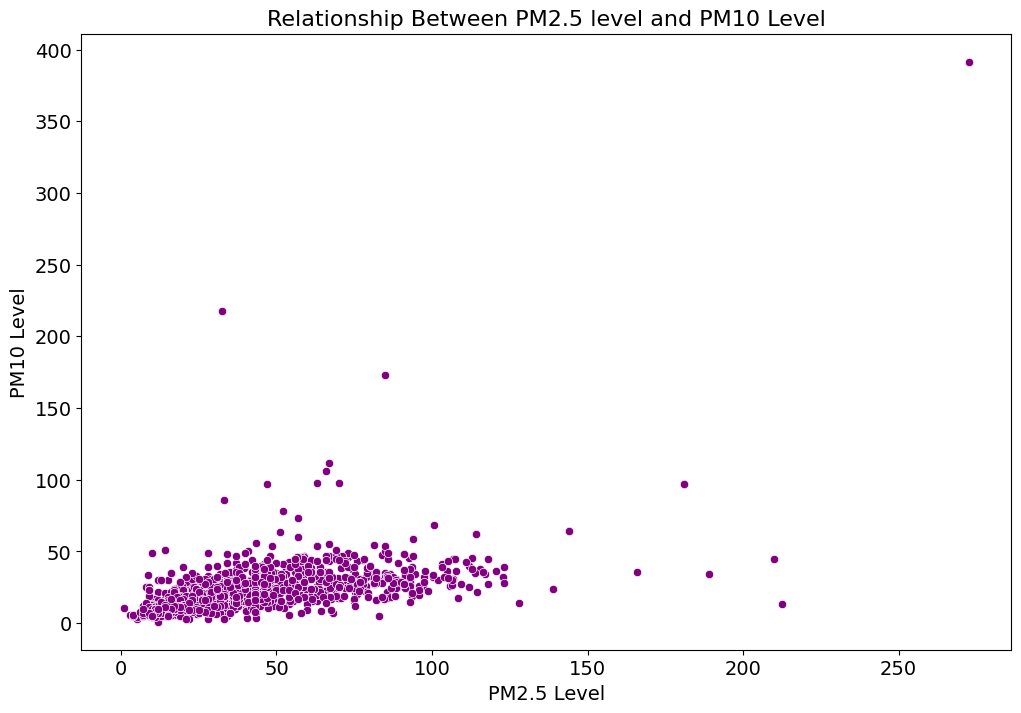

In [10]:
corr = df['pm2_5'].corr(df['pm10'])
print("Correlation between PM2.5 and PM10 is: ", round(corr, 2))

# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.scatterplot(x = 'pm2_5', y = 'pm10', data = df, color = 'purple')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM10 Level', fontsize = 14)
plt.xlabel("PM2.5 Level", fontsize = 14)
plt.title("Relationship Between PM2.5 level and PM10 Level", fontsize= 16)
plt.show();

Observation: The chart shows that PM2.5 and PM10 follow a similar trend over time, with both rising and falling together. However, PM2.5 levels consistently remain higher than PM10. This parallel behavior suggests that PM10 can be analyzed in a similar manner to PM2.5.

## PM10 Analysis

### Distribution of Values

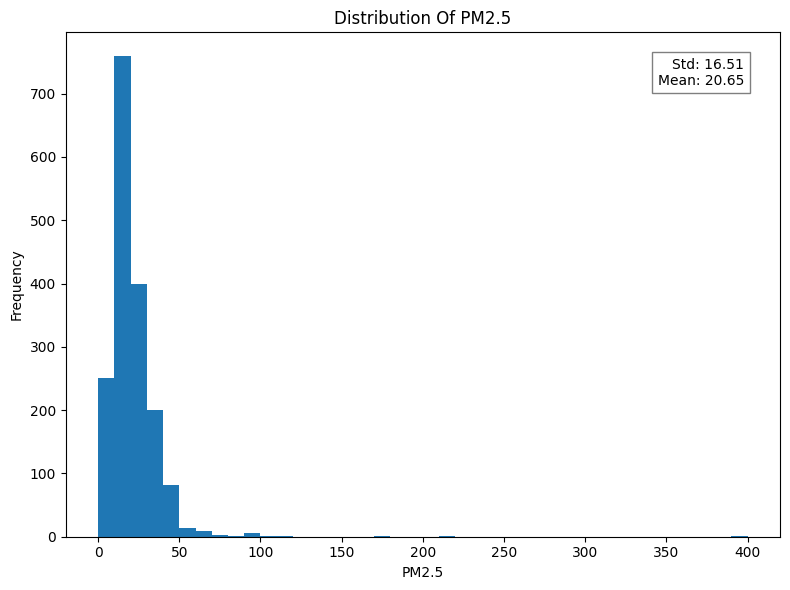

In [11]:
fig, axs = plt.subplots(figsize=(8, 6))
std = df['pm10'].std()  
mean = df['pm10'].mean() 

bins=np.arange(0,df['pm10'].max()+10,10)
axs.hist(df['pm10'], bins=bins)
axs.set_xlabel('PM2.5')
axs.set_ylabel("Frequency")
axs.set_title(f"Distribution Of PM2.5")

axs.text(0.95, 0.95, f"Std: {std:.2f}\nMean: {mean:.2f}", 
         transform=axs.transAxes, ha="right", va="top", 
         bbox=dict(facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()

Observation: PM2.5 concentration values are primarily concentrated between 0 and 50, indicating that low concentrations are quite common. The distribution is right-skewed, with a few outlier values.

### Seasonal Distribution 

<Figure size 1500x700 with 0 Axes>

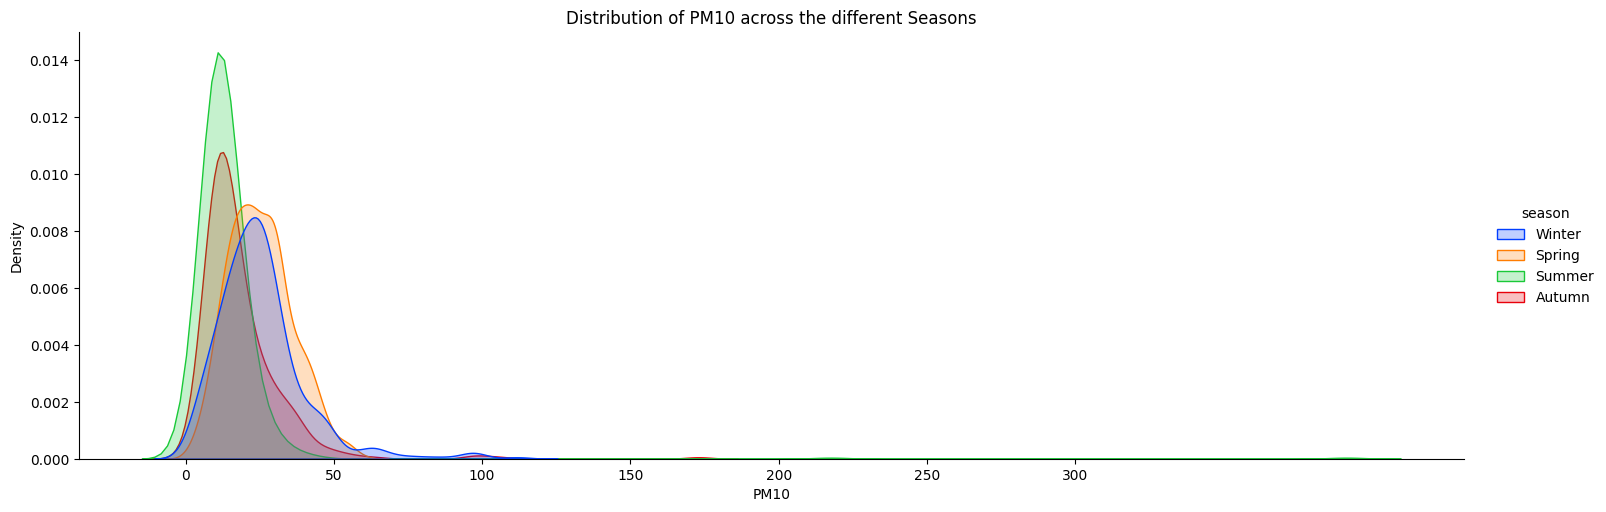

In [12]:
x = [0, 50, 100, 150, 200, 250, 300]
plt.figure(figsize = (15, 7))
sns.displot(data = df, x = 'pm10', hue = 'season', kind = 'kde', fill = True, height =5, aspect = 3, palette = sns.color_palette('bright')[:4])
plt.xticks(x)
plt.title('Distribution of PM10 across the different Seasons')
plt.xlabel('PM10')
plt.show()

Observation: The PM10 distribution skews right, with concentrations primarily between 50 and 120 in Spring and Winter, Spring showing the highest density. In contrast, Summer and Autumn predominantly fall within lower PM10 levels (mainly below 50), with Summer exhibiting the lowest densities overall, and Autumn slightly below Spring and Winter.

### Overtime Diagram (from 2020-2024)

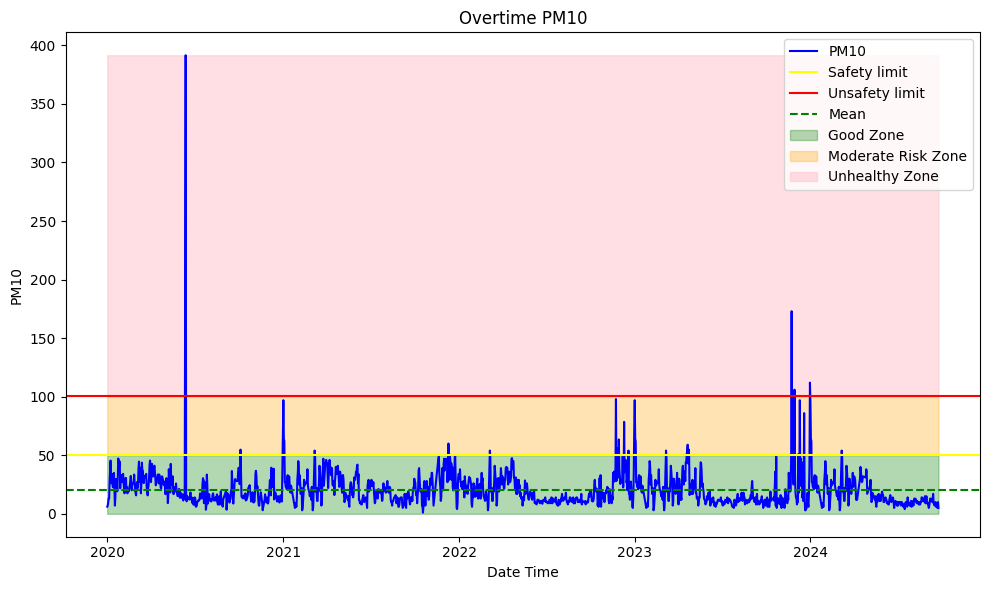

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df["date_time"], df["pm10"], label="PM10", color="b")
plt.xlabel("Date Time")
plt.ylabel("PM10")
plt.title("Overtime PM10")
plt.axhline(y=50, color="yellow", label="Safety limit", linestyle="-")
plt.axhline(y=101, color="red", label="Unsafety limit", linestyle="-")
plt.axhline(y=mean, color="green", label="Mean", linestyle="--")
plt.fill_between(df["date_time"], y1=0, y2=50, color='green', alpha=0.3, label='Good Zone')
plt.fill_between(df["date_time"], y1=51, y2=100, color='orange', alpha=0.3, label='Moderate Risk Zone')
plt.fill_between(df["date_time"], y1=101, y2=df["pm10"].max(), color='pink', alpha=0.5, label='Unhealthy Zone')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

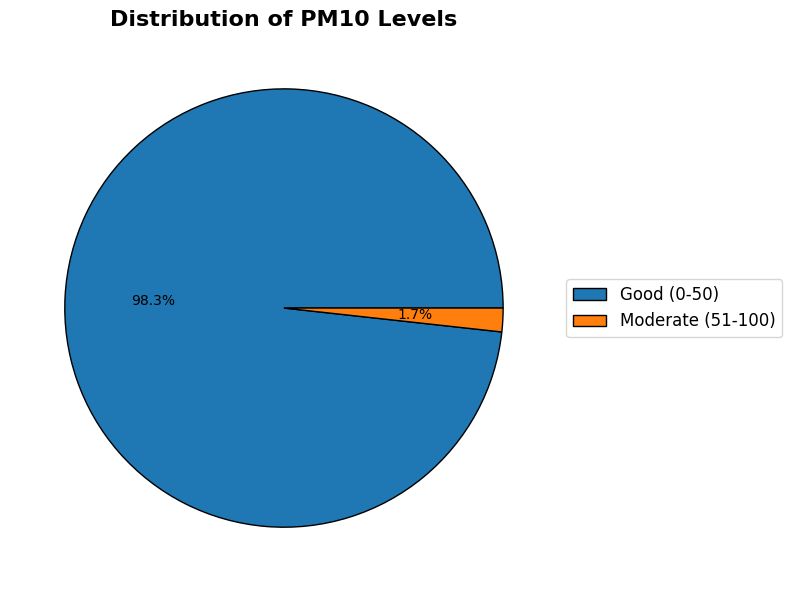

In [14]:
good = len(df.loc[df["pm10"] <= 50])
moderate = len(df.loc[(df["pm10"] >= 51) & (df["pm10"] <= 100)])
interval = [good, moderate]
labels = ["Good (0-50)", "Moderate (51-100)"]

plt.figure(figsize=(8, 8))
explode = [0, 0]
plt.pie(interval, wedgeprops={"edgecolor": "black", "linewidth": 1}, autopct='%1.1f%%', explode=explode)

plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

plt.title("Distribution of PM10 Levels", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


Observation: The PM10 graph from 2020 to 2024 reveals notable fluctuations in PM10 levels over time, with the safe limit occasionally surpassed during specific periods. Overall, Da Nang's PM10 levels predominantly fall within the good range, comprising 78.3%, while 20% are classified as moderate, and only about 3% exceed the unhealthy threshold (above 101).

### Average PM10 Per Year

year
2020    22.418079
2021    23.012329
2022    19.953425
2023    19.816438
2024    17.082397
Name: pm10, dtype: float64
1550


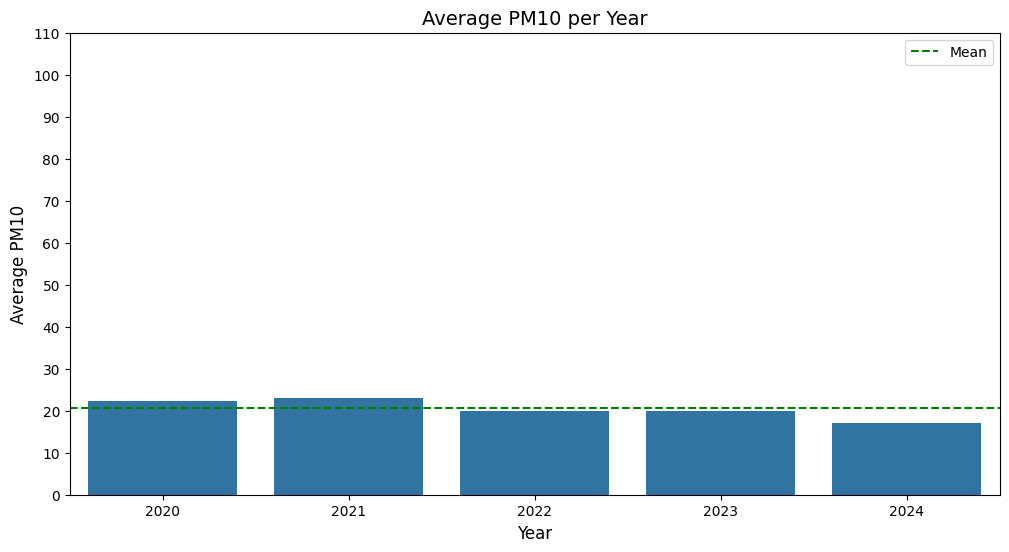

In [30]:
year = df.groupby('year')['pm10'].mean().sort_index()
print(year)

y = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100, 110]
plt.figure(figsize= [12, 6])
sns.barplot(x = year.index, y = year)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average PM10', fontsize = 12)
plt.title('Average PM10 per Year', fontsize = 14)
plt.yticks(y)
date_high=len(df[df['pm10']<36])
print(date_high)
plt.axhline(mean, ls= '--', color= 'green',label='Mean')
plt.legend()
plt.show()

Observation: From the chart, we can see that the PM10 level in 2020 was significant high, while in the following years it remained below the average threshold, showing a slight downward trend over time.

### Average PM10 Per Month Across All Years

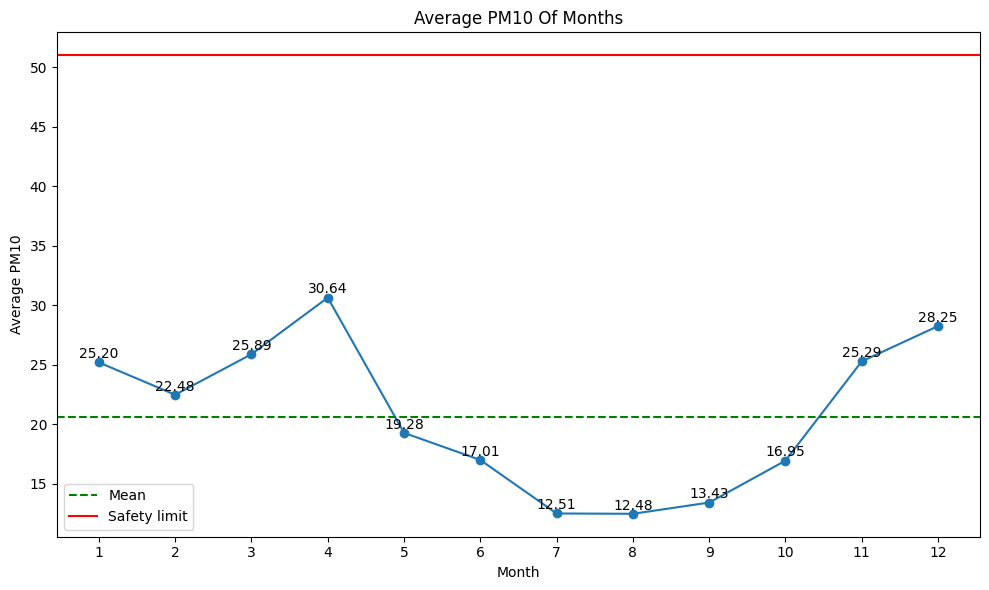

In [16]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["pm10"].mean())
plt.plot(idx, data, marker="o")
plt.title("Average PM10 Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average PM10")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=df["pm10"].mean(), color="green", label="Mean", linestyle="--")
plt.axhline(51, ls= '-', color= 'Red',label='Safety limit')
plt.legend()
plt.tight_layout()
plt.show()

Observation: It is observed that the PM10 levels are higher at the start of the year and towards the end of the year, with a significant change observed in April.

### Average PM10 Per Season

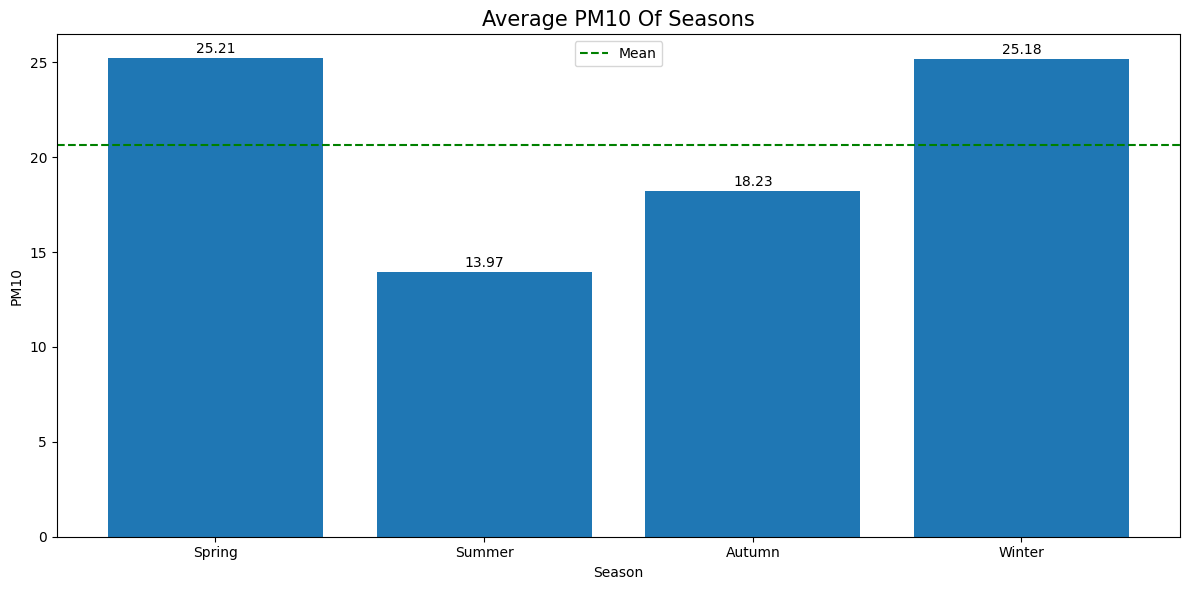

In [31]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["pm10"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average PM10 Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("PM10", size=10)
plt.axhline(mean, ls= '--', color= 'green', label='Mean')
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

Observation: The charts above indicate that PM10 levels are highest on average during the Winter (December to February) and Spring (March to May) seasons, with average concentrations of 25.18 and 25.21, respectively. In contrast, PM10 levels in Summer and Autumn are considerably lower (13.97 and 18.23 respectively), with Summer recording the lowest levels overall.

### Correlation between Wind and PM10

### Wind Speed Average per month

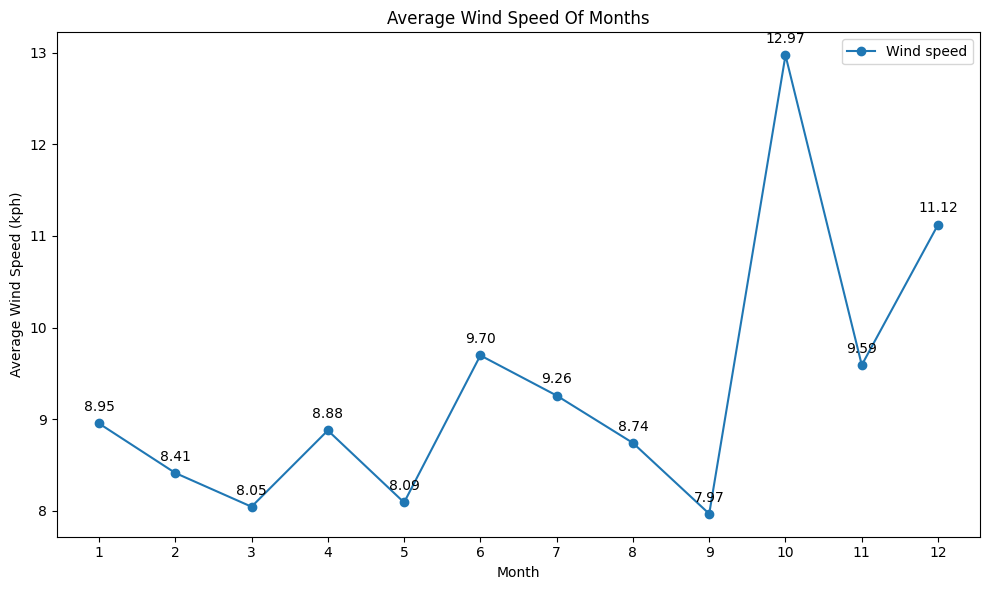

In [18]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["wind_kph"].mean())
plt.plot(idx, data, marker="o", label='Wind speed')
plt.title("Average Wind Speed Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Wind Speed (kph)")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

### Seansonal Wind Speed Average

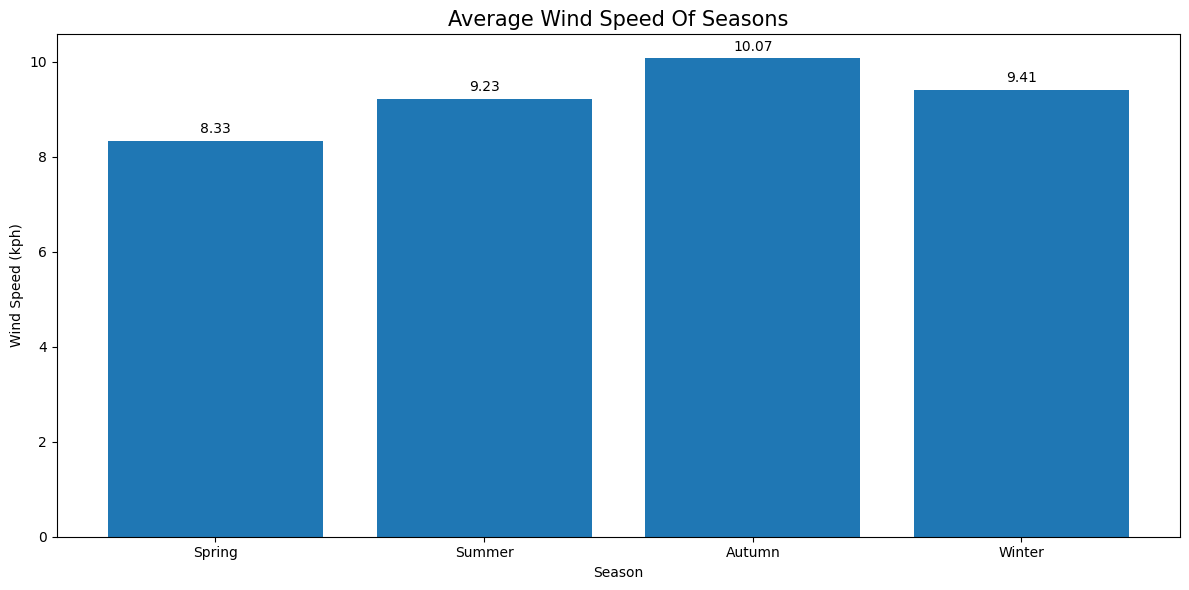

In [32]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["wind_kph"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Wind Speed Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("Wind Speed (kph)", size=10)
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

Observation: Analyzing the wind speed both monthly and seasonally reveals that wind speed peaks during the Autumn season, followed closely by the Winter season. In contrast, the Spring season experiences the lowest wind speeds overall.

### Correlation and Scatterplot

Correlation Between PM10 And Wind: -0.037745369608635074


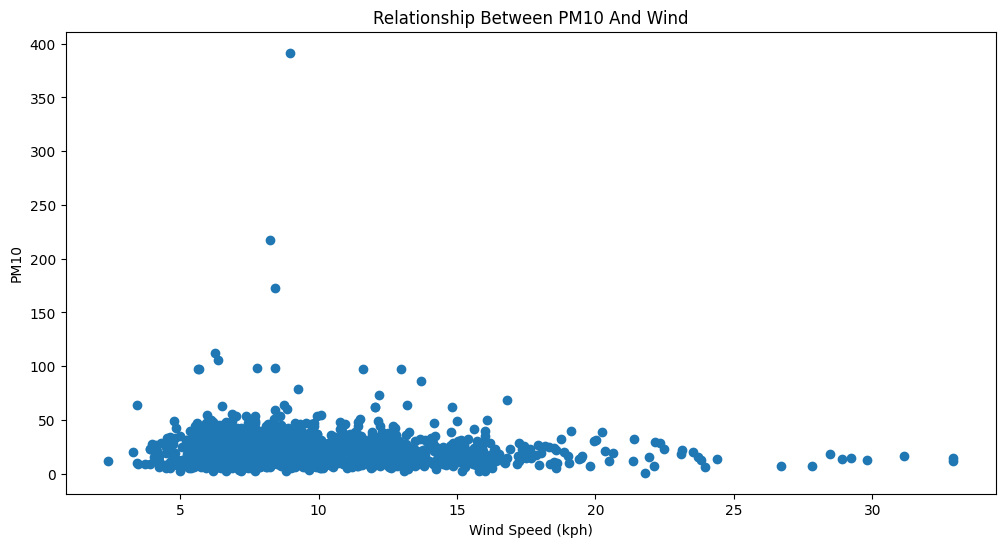

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df["wind_kph"], df["pm10"])
plt.xlabel("Wind Speed (kph)")
plt.ylabel("PM10")
plt.title("Relationship Between PM10 And Wind")
corr = df["pm10"].corr(df["wind_kph"], method="pearson")
print(f"Correlation Between PM10 And Wind: {corr:}")
plt.show()

Observation: The visual indicates a correlation coefficient of -0.03, suggesting a negligible correlation and no significant relationship between PM10 levels and wind speed. However, closer examination on the scatterplot diagram reveals that higher PM10 levels occur at low wind speeds, while extreme PM10 values are absent at higher wind speeds.

### Correlation between Temperature and PM10

### Temperature Average per month

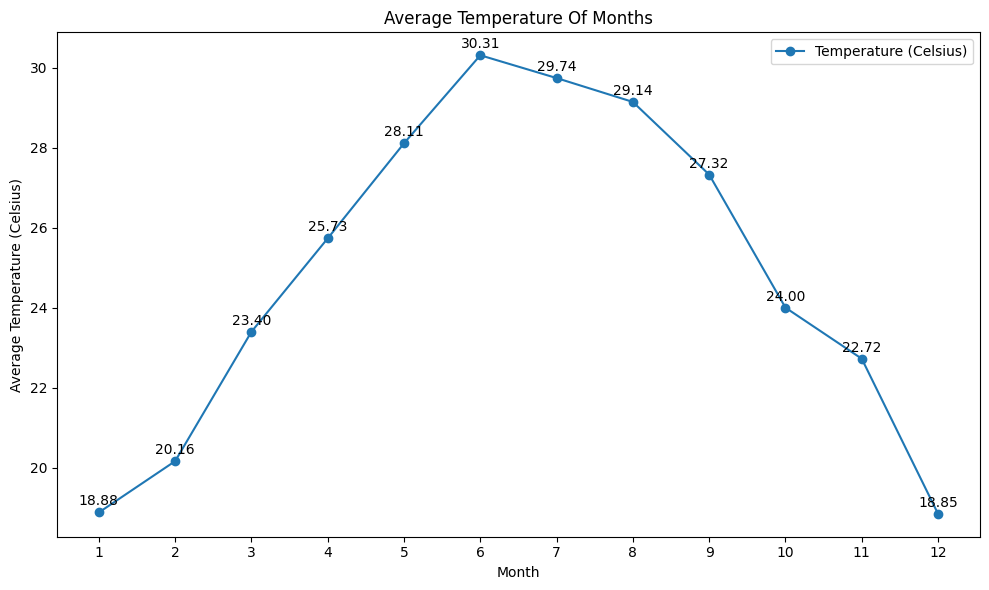

In [21]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["temp_c"].mean())
plt.plot(idx, data, marker="o", label='Temperature (Celsius)')
plt.title("Average Temperature Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Temperature (Celsius)")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

### Seansonal Temperature Average

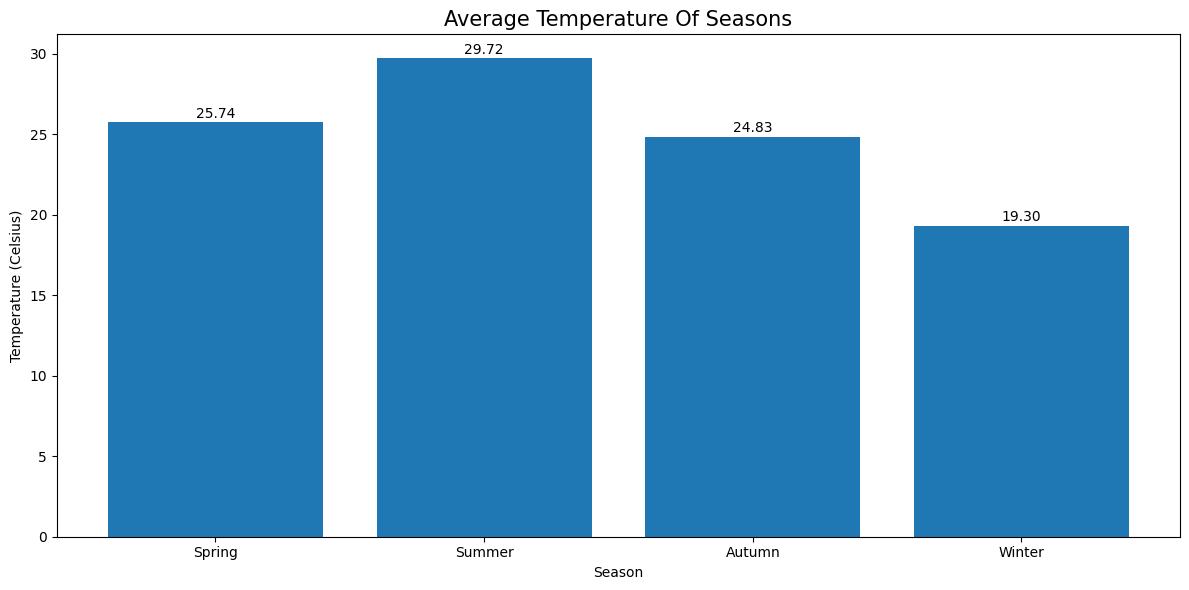

In [22]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["temp_c"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Temperature Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("Temperature (Celsius)", size=10)
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

Observation: The chart above indicates that average temperatures are lowest in winter, highest in summer, and moderate in autumn and spring.

### Correlation and Scatterplot

Correlation Between PM10 And Temp: -0.17266801714016877


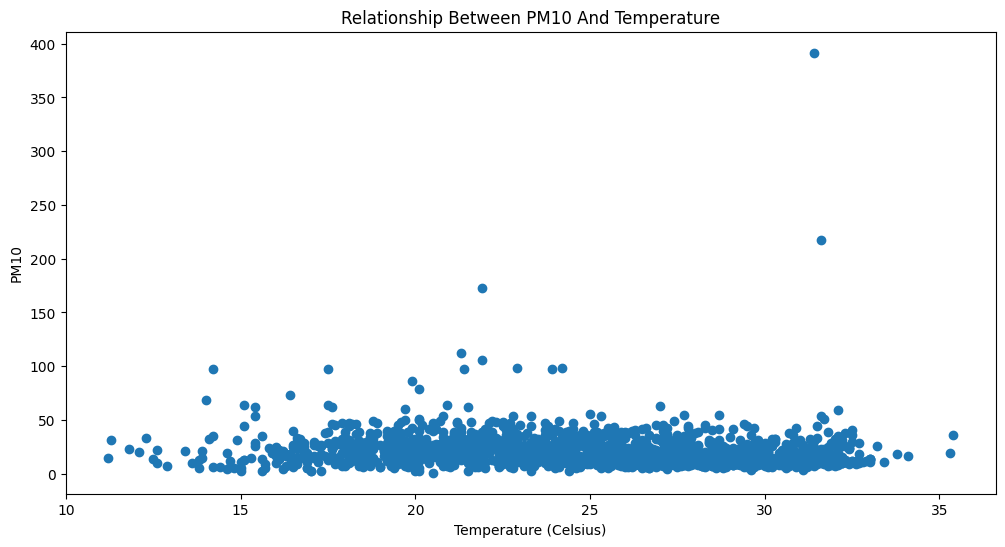

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(df["temp_c"], df["pm10"])
plt.xlabel("Temperature (Celsius)")
plt.ylabel("PM10")
plt.title("Relationship Between PM10 And Temperature")
corr = df["pm10"].corr(df["temp_c"], method="pearson")
print(f"Correlation Between PM10 And Temp: {corr:}")
plt.show()

Observation: The Relatioship between Temperature and the PM10 Level is close to zero which means there is no correlation. On trying to observe patterns, we cannot seem to see a clear pattern in the scatter diagram.

### Correlation between Humidity and PM10

### Humidity Average per month

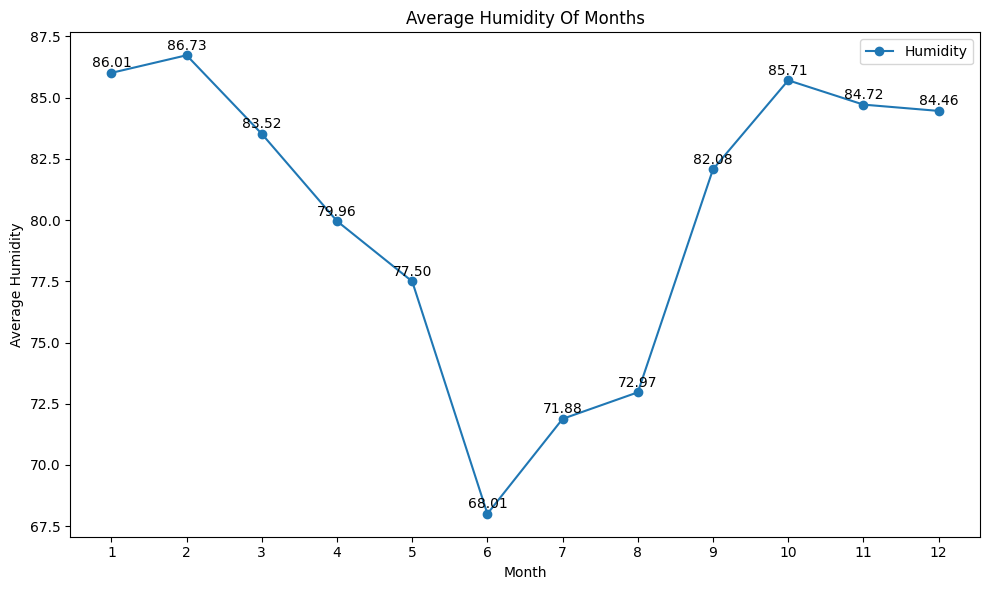

In [24]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["humidity"].mean())
plt.plot(idx, data, marker="o", label='Humidity')
plt.title("Average Humidity Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Humidity")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

### Seansonal Humidity Average

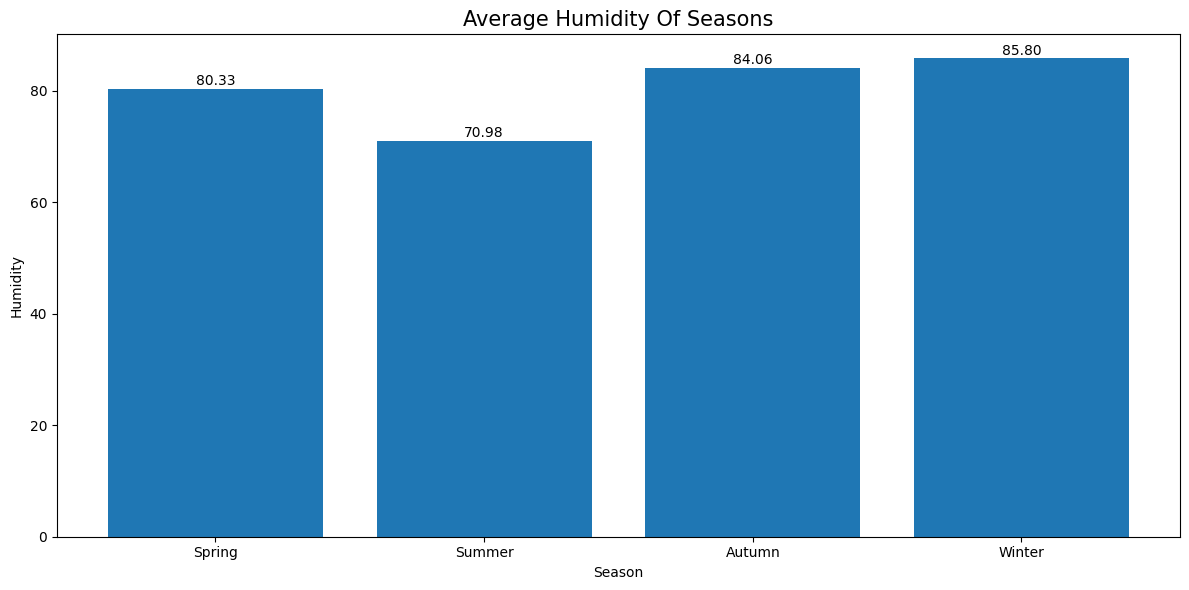

In [25]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["humidity"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Humidity Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("Humidity", size=10)
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

Observation: The analysis reveals that humidity levels are at their lowest during the summer months, while they peak in spring, autumn, and winter.

### Correlation and Scatterplot

Correlation Between PM10 And Humidity: 0.08318888553435431


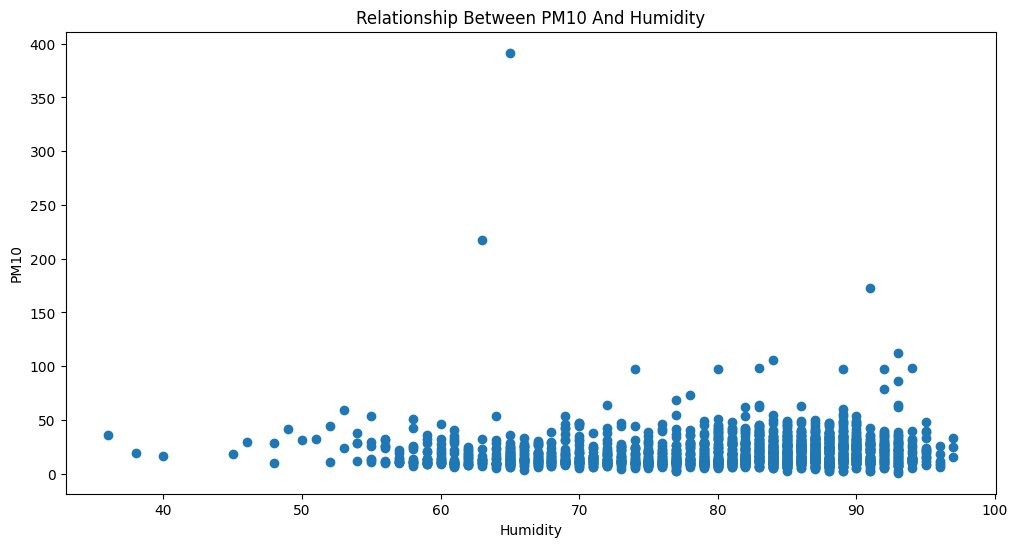

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(df["humidity"], df["pm10"])
plt.xlabel("Humidity")
plt.ylabel("PM10")
plt.title("Relationship Between PM10 And Humidity")
corr = df["pm10"].corr(df["humidity"], method="pearson")
print(f"Correlation Between PM10 And Humidity: {corr:}")
plt.show()

Observation: From the chart, we see that the correlation between PM10 and humidity is very low (0.08), suggesting little to no linear relationship. However, a closer look reveals that at higher humidity levels, PM10 concentrations tend to rise, hinting that humidity may have a certain influence on PM10 levels.

### Correlation between Precipitation and PM10

### Precipitation Average per month

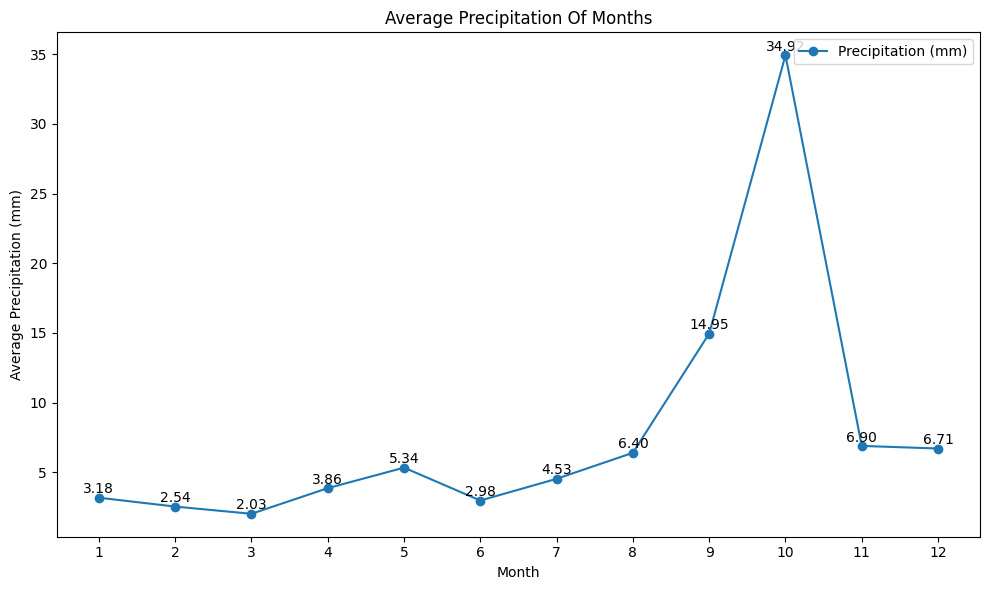

In [27]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["totalprecip_mm"].mean())
plt.plot(idx, data, marker="o", label='Precipitation (mm)')
plt.title("Average Precipitation Of Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Precipitation (mm)")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()

### Seansonal Precipitation Average

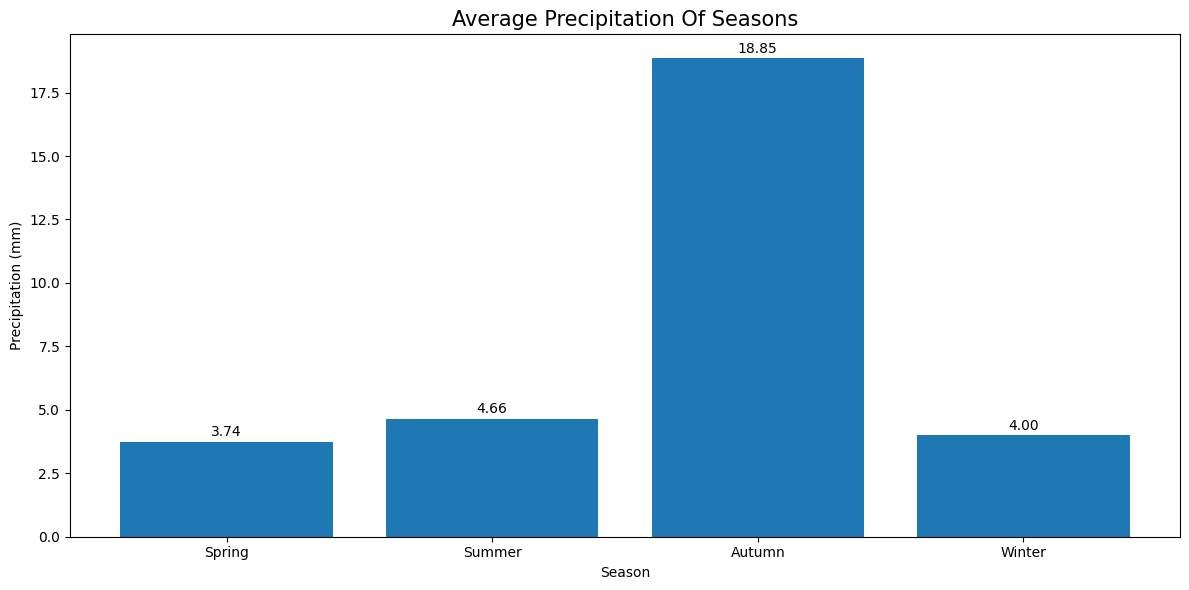

In [28]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(0, 4)]
data = []
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["totalprecip_mm"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Precipitation Of Seasons", size=15)
plt.xlabel("Season", size=10)
plt.ylabel("Precipitation (mm)", size=10)
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

Observation: The amount of rainfall (Precipitation Level) is observed highest in the Autumn season

### Correlation and Scatterplot

Correlation Between PM10 And Precipitation: -0.07042917382942043


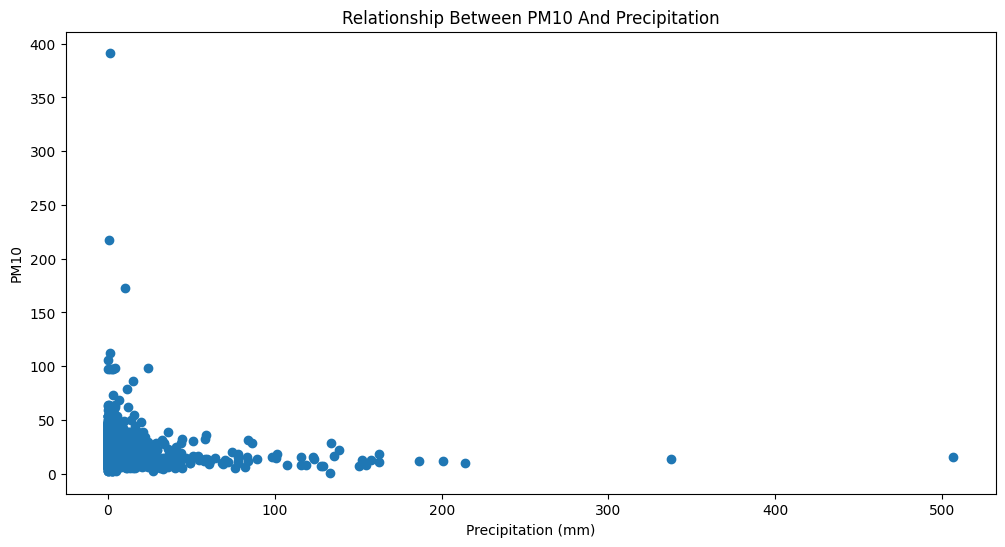

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(df["totalprecip_mm"], df["pm10"])
plt.xlabel("Precipitation (mm)")
plt.ylabel("PM10")
plt.title("Relationship Between PM10 And Precipitation")
corr = df["pm10"].corr(df["totalprecip_mm"], method="pearson")
print(f"Correlation Between PM10 And Precipitation: {corr:}")
plt.show()

Observation: The correlation between number of hours of precipitation and PM10 is almost 0, this means that there is no linear relationship between the two variables. On looking for patterns, It is observed that for Low amount of precipitation (below 50 mm), There are observed to be high PM10 level. It is safe to say that the lower the amount of rainfall, the higher the PM10 level

# CONCLUSION:
### PM10
-Seasonal Variation: PM10 levels tend to peak at the beginning and end of each year, with a noticeable increase in April and lower levels during mid-year.

-Air Quality Range: Most PM10 concentrations fall within the “Good” category, with an average AQI of 20.

-Long-Term Trend: There is a gradual decrease in PM10 levels over recent years, indicating an overall improvement in air quality.

### Weather:
-Temperatures show mild seasonal fluctuations. Spring and autumn remain cool at around 25°C, while summer peaks at 30.31°C in June. Winter is coldest, with temperatures averaging 18°C in December and January.

-Wind speeds remain stable from January through September but increase significantly starting in October, becoming more variable by year-end.

-Humidity is low in summer, reaching its lowest in June at 68%, and rises significantly in autumn and winter, averaging over 84%.

-Rainfall is concentrated at the end of the year, with October accounting for over 50% of the annual total of 2886.5mm.

### Impact of Weather on PM10 Levels:
-Temperature: While the correlation between temperature and PM10 is near zero, indicating no clear linear relationship, observations suggest that PM10 levels vary without a strong pattern across temperatures.

-Wind Speed: The correlation with PM10 is also negligible, but patterns show that higher PM10 levels are generally associated with low wind speeds. Conversely, extreme PM10 values are rarely seen at higher wind speeds, possibly due to greater pollutant dispersion.

-Humidity: A low correlation (0.08) suggests minimal linear impact, but higher humidity levels tend to accompany higher PM10 concentrations, hinting that humidity might contribute to particle accumulation.

Precipitation: The relationship with PM10 is near zero, indicating no direct correlation. However, patterns reveal that low precipitation (below 10 mm) often aligns with elevated PM10, suggesting that limited rainfall may allow for higher pollutant concentrations.

## Overall: In summary, although no individual weather factor shows a strong correlation with PM10 levels, certain patterns indicate that lower wind speeds, elevated humidity, and limited rainfall may contribute to increased PM10 accumulation, affecting air quality in specific conditions. Additionally, the AQI level of PM10 consistently remains lower than that of PM2.5.

